In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np

os.chdir('/Users/worm/Desktop/Research_Stowers/RCNet-Raj/DCNet-Rebuilt')
os.getcwd()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


'/Users/worm/Desktop/Research_Stowers/RCNet-Raj/DCNet-Rebuilt'

In [2]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from tqdm import tqdm

mnist_data = MNIST(
    root = 'data',
    train = True,                         
    transform = transforms.ToTensor(), 
    download = True,            
)

In [3]:
from loading import SequentialLoader
from metrics import Conncetedness, Consistency

metric1 = Conncetedness()
metric2 = Consistency()

# CODE FIX:
# Original: loader = SequentialLoader(mnist_data, num_classes=10)
# Note: Code not working, SequentialLoader accept dataset, transforms as argument
# Note: Here the transformations is defined by Raj, not the traditional torchvision.transforms module in pytorch
# Reference: 
# - DCNet_Autoencoder: dc_transform = transformations.Compose([transformations.Scale(), transformations.ToVector()])
# - AnchorOrganizer: transform = transformations.Compose([Scale(), ToVector()])
# Updated: 
import transformations

dc_transform = transformations.Compose([transformations.Scale(), transformations.ToVector()])
loader = SequentialLoader(mnist_data, transforms=dc_transform)

100
0.99
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


100:   0%|          | 0/50 [00:00<?, ?it/s]

torch.Size([1, 784])
Training goes here!
torch.Size([1, 500])
torch.Size([1, 500])


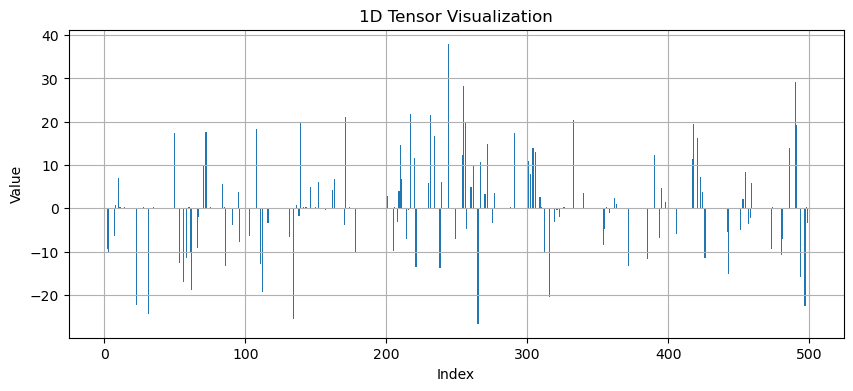

Proportion of non-zero values: 1.00 (500/500)
torch.Size([1, 500])


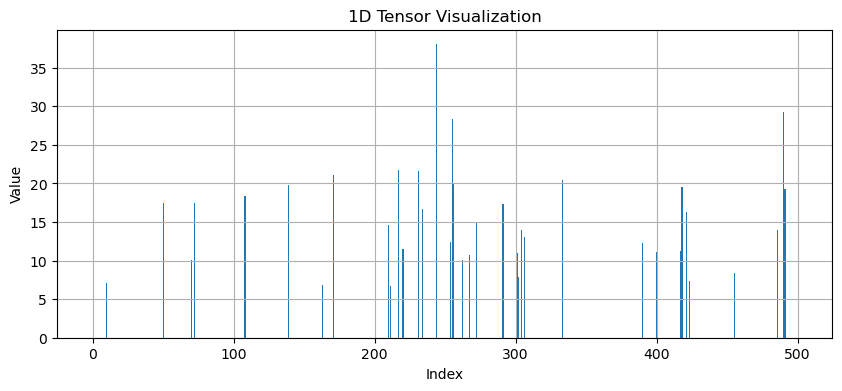

100:   0%|          | 0/50 [00:00<?, ?it/s]

Proportion of non-zero values: 0.07 (37/500)


AssertionError: 

In [4]:
from initialization import DatasetInitializer, IdentityInitializer
from layers import DiscriminationModule, ClassificationModule

train_size = 5000
precisions = []
recalls = []
consistencies = []

for epoch in range(100, 600, 100):
    # epoch: 100, 200, 300, 400, 500
    print(epoch)
    metric1.reset()
    metric2.reset()
    
    precision = []
    recall = []
    consistency = []
    
    beta = 1 - (1/epoch)
    print(beta)
    # CODE FIX:
    # Original: loader = module_d = DiscriminationModule(500, DatasetInitializer(dataset=mnist_data, num_classes=10), beta=beta)
    # Note: Code not working, DatasetInitializer accept dataset, transforms as argument
    # Reference: 
    # - DCNet_Autoencoder: 
    # disc_layer = DiscriminationModule(DC_OUT_DIM, initializer=DatasetInitializer(mnist_data, transforms=dc_transform), beta=0.98)
    # Updated:
    module_d = DiscriminationModule(500, DatasetInitializer(dataset=mnist_data, transforms=dc_transform), beta=beta)
    module_c = ClassificationModule(500, IdentityInitializer())
    
    for epoch_number in tqdm(range(train_size//epoch), desc=str(epoch)):
        # Code comment note: There is no attribute 'teaching' in ClassificationModule object, and key word 'teaching'
        # only show up in this line in the whole workspace.
        # module_c.teaching('on') if epoch_number == 0 else module_c.teaching('off')
        for x in loader(epoch):
            # The transformation operations defined in dc_transform only target the data part, ignoring the label.
            # Therefore, the x obtained in the loop contains only the data and no label information.
            # For MNIST data here, x is a tenser with shape torch.Size([1, 784]) and x has been normalized to [0,1]
            print(x.shape)
            y_ = module_d(x)
            assert False
            #module_c(y_)    